# Sprawozdanie 1
Arkadiusz Kraus

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from mpmath import zeta, altzeta
from IPython.display import HTML, display
import sys
import tabulate

# Zadanie 1

## 1.1

In [41]:
N = 10**7
v = np.float32(0.5231)
tab = [v for i in range(N)]
exp_val = N * v

In [42]:
def sum():
    sum = np.float32(0)
    for i in tab:
        sum += i
    return sum

sum(), exp_val

(5025255.5, 5231000.185012817)

## 1.2

In [43]:
abs_diff = abs(exp_val - sum())
rel_diff = abs_diff/exp_val
abs_diff, rel_diff

(205744.68501281738, 0.03933180610512887)

Otrzymany względny błąd jest duży (~4%) ponieważ wartość trzymana w zmiennej sum powiększa się, natomiast dodawana wartość jest stała i dochodzi pod koniec do dodawania dużej wartości do małej, przez co tracimy dokładność.

## 1.3

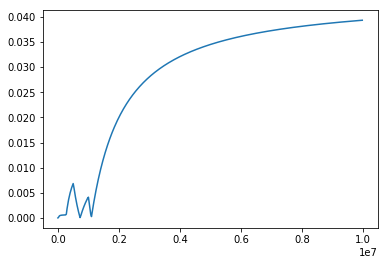

In [44]:
def count_rel_diffs():
    step = 25000
    x = []
    y = []
    sum = np.float32(0)
    for i,v in enumerate(tab):
        sum += v
        if i%step == 0:
            c_exp_val = (i+1)*v
            y.append(abs(c_exp_val - sum)/c_exp_val)
            x.append(i)
    return x, y
x, y = count_rel_diffs()
plt.plot(x,y, label = "Relative diff")

Na początku gdy liczby są podobnego rzędu wielkości błąd jest niestabilny i na przemian rośnie i maleje. Następnie stabilizuje się on i zaczyna rosnąć. Szybkość wzrostu maleje, a wykres przypomina funkcję sqrt(x).

## 1.4

In [45]:
def rec_sum(start, end):
    if(end - start <= 1):
        return tab[start]
    m = int((start + end)/2)
    return rec_sum(start, m) + rec_sum(m, end)

rec_sum(0, N), exp_val

(5231000.0, 5231000.185012817)

## 1.5

In [46]:
rec_abs_diff = abs(exp_val - rec_sum(0, N))
rec_rel_diff = rec_abs_diff/exp_val
rec_abs_diff, rec_rel_diff

(0.1850128173828125, 3.5368535813263244e-08)

Błąd znacząco zmalał, ponieważ teraz cały czas dodajemy liczby podobnego rzędu, więc nie dochodzi do dodawania dużych liczb z małymi (cały czas dodajemy takie same liczby do siebie).

## 1.6

In [47]:
def time_in_milis():
    return int(time.time()*1000)

st_t = time_in_milis()
sum()
en_t = time_in_milis()
print("Sum took " + str(en_t - st_t) + " ms")
st_t = time_in_milis()
rec_sum(0, N)
en_t = time_in_milis()
print("Recursive sum took " + str(en_t - st_t) + " ms")

Sum took 852 ms
Recursive sum took 6452 ms


Drugi algorytm działa około 8 razy wolniej. Wynika to z zastosowania rekurencji. 

## 1.7

Dla danych użytych w podpunktach 1.5-1.6 błąd wychodzi bardzo mały jednak niezerowy.

# Zadanie 2

## 2.1

In [48]:
def kahan():
    sum = np.float32(0)
    err = np.float32(0)
    for i in tab:
        y = i - err
        tmp = sum + y
        err = (tmp - sum) - y
        sum = tmp
    return sum

kahan()

5231000.0

In [49]:
kah_abs_diff = abs(exp_val - kahan())
kah_rel_diff = kah_abs_diff/exp_val
kah_abs_diff, kah_rel_diff

(0.1850128173828125, 3.5368535813263244e-08)

## 2.2

Zadaniem zmiennej err jest przenoszenie błędu z poprzedniego dodawania tak, aby kompensował się on w następnym kroku. Dzięki tej kompensacji algorytm ma znacznie lepsze właściwości numeryczne. 

## 2.3

In [50]:
st_t = time_in_milis()
sum()
en_t = time_in_milis()
print("Sum took " + str(en_t - st_t) + " ms")
st_t = time_in_milis()
kahan()
en_t = time_in_milis()
print("Kahan sum took " + str(en_t - st_t) + " ms")

Sum took 843 ms
Kahan sum took 3475 ms


# Zadanie 3

In [51]:
headers = ["x", "n", "expected value", "forward result", "forward relative diff", 
           "backward result", "backward relative diff"]

xs = [2, 3.6667, 5, 7.2, 10]
ns = [50, 100, 200, 500, 1000]

In [52]:
def comp(fun1, fun2, exp, x, n, f = np.float64):
    vf1 = fun1(x, n, f)
    vf2 = fun2(x, n, f)
    vexp = exp(x)
    return [x, n, vexp, vf1, abs(vf1-vexp)/vexp, vf2, abs(vf2-vexp)/vexp]

In [53]:
def dzeta(s, n, f = np.float64):
    sum = f(0)
    for k in range(1,n+1):
        sum += f(1)/(f(k)**f(s))
    return sum

In [54]:
def dzeta_back(s, n, f = np.float64):
    sum = f(0)
    for k in range(n,0,-1):
        sum += f(1)/(f(k)**f(s))
    return sum

In [55]:
dzeta_table = [ headers ]
for x in xs:
    for n in ns:
        dzeta_table.append(comp(dzeta, dzeta_back, zeta, x, n))
display(HTML(tabulate.tabulate(dzeta_table, tablefmt='html')))

x,n,expected value,forward result,forward relative diff,backward result,backward relative diff
2,50,1.64493406684823,1.625132733621529,0.0120377671213519,1.6251327336215293,0.0120377671213518
2,100,1.64493406684823,1.6349839001848923,0.00604897598260528,1.634983900184893,0.00604897598260487
2,200,1.64493406684823,1.6399465460149971,0.00303204908558166,1.6399465460149973,0.00303204908558153
2,500,1.64493406684823,1.642936065514894,0.00121463916007331,1.6429360655148941,0.00121463916007317
2,1000,1.64493406684823,1.6439345666815615,0.000607623239623237,1.6439345666815597,0.000607623239624317
3.6667,50,1.10941051458645,1.1093997551541945,9.69833268880896e-6,1.1093997551541943,9.69833268900911e-6
3.6667,100,1.10941051458645,1.1094087973421474,1.54788897663159e-6,1.1094087973421476,1.54788897643144e-6
3.6667,200,1.10941051458645,1.1094102423332313,2.45403499073838e-7,1.109410242333231,2.45403499273985e-7
3.6667,500,1.10941051458645,1.1094104908440712,2.14008989190728e-8,1.1094104908440725,2.14008977181939e-8
3.6667,1000,1.10941051458645,1.1094105108423578,3.37485146473295e-9,1.1094105108423593,3.37485006370762e-9


In [56]:
dzeta_table = [ headers ]
for x in xs:
    for n in ns:
        dzeta_table.append(comp(dzeta, dzeta_back, zeta, x, n, np.float32))
display(HTML(tabulate.tabulate(dzeta_table, tablefmt='html')))

x,n,expected value,forward result,forward relative diff,backward result,backward relative diff
2,50,1.64493406684823,1.6251329183578491,0.0120376548151363,1.62513267993927,0.0120377997562521
2,100,1.64493406684823,1.634984016418457,0.00604890532107111,1.6349838972091675,0.00604897779162902
2,200,1.64493406684823,1.639946699142456,0.00303195599524934,1.639946460723877,0.00303210093636516
2,500,1.64493406684823,1.6429359912872314,0.00121468428508102,1.6429359912872314,0.00121468428508102
2,1000,1.64493406684823,1.6439348459243774,0.000607453480347404,1.6439344882965088,0.000607670892021136
3.6667,50,1.10941051458645,1.109399437904358,9.98429521796486e-6,1.1093997955322266,9.66193675466361e-6
3.6667,100,1.10941051458645,1.1094086170196533,1.71042799323265e-6,1.1094088554382324,1.49552235103181e-6
3.6667,200,1.10941051458645,1.1094086170196533,1.71042799323265e-6,1.109410285949707,2.06088497826792e-7
3.6667,500,1.10941051458645,1.1094086170196533,1.71042799323265e-6,1.1094105243682861,8.81714437404423e-9
3.6667,1000,1.10941051458645,1.1094086170196533,1.71042799323265e-6,1.1094105243682861,8.81714437404423e-9


In [57]:
def eta(s, n, f = np.float64):
    sum = f(0)
    for k in range(1, n+1):
        val = f(1)/(f(k)**f(s))
        sum += val if k%2 ==1 else -val
    return sum


In [58]:
def eta_back(s, n, f = np.float64):
    sum = f(0)
    for k in range(n, 0, -1):
        val = f(1)/(f(k)**f(s))
        sum += val if k%2 ==1 else -val
    return sum

In [59]:
eta_table = [ headers ]
for x in xs:
    for n in ns:
        eta_table.append(comp(eta, eta_back, altzeta, x, n))
display(HTML(tabulate.tabulate(eta_table, tablefmt='html')))

x,n,expected value,forward result,forward relative diff,backward result,backward relative diff
2,50,0.822467033424113,0.8222710318260295,0.000238309366963624,0.8222710318260289,0.000238309366964299
2,100,0.822467033424113,0.8224175333741286,6.0184843857544e-5,0.8224175333741282,6.01848438580839e-5
2,200,0.822467033424113,0.822454595922551,1.51221885580415e-5,0.8224545959225509,1.51221885581765e-5
2,500,0.822467033424113,0.8224650374240963,2.42684501119177e-6,0.8224650374240972,2.42684501011188e-6
2,1000,0.822467033424113,0.8224665339241114,6.07319176946638e-7,0.8224665339241127,6.07319175326795e-7
3.6667,50,0.934693343919125,0.9346930600307106,3.03723586232682e-7,0.934693060030711,3.03723585876344e-7
3.6667,100,0.934693343919125,0.9346933211400662,2.43706227390868e-8,0.934693321140067,2.43706219076311e-8
3.6667,200,0.934693343919125,0.9346933421086845,1.93693534570691e-9,0.9346933421086852,1.93693463303059e-9
3.6667,500,0.934693343919125,0.9346933438558745,6.76698045914325e-11,0.934693343855875,6.76693294738843e-11
3.6667,1000,0.934693343919125,0.9346933439141353,5.33842077119472e-12,0.9346933439141354,5.33830199180767e-12


In [60]:
eta_table = [ headers ]
for x in xs:
    for n in ns:
        eta_table.append(comp(eta, eta_back, altzeta, x, n, np.float32))
display(HTML(tabulate.tabulate(eta_table, tablefmt='html')))

x,n,expected value,forward result,forward relative diff,backward result,backward relative diff
2,50,0.822467033424113,0.8222709894180298,0.000238360928908291,0.8222710490226746,0.00023828845835038
2,100,0.822467033424113,0.8224174976348877,6.02282975638297e-5,0.8224174976348877,6.02282975638297e-5
2,200,0.822467033424113,0.8224546909332275,1.50066694275629e-5,0.822454571723938,1.51516105433842e-5
2,500,0.822467033424113,0.8224653601646423,2.03443956155045e-6,0.8224650621414185,2.39679235110387e-6
2,1000,0.822467033424113,0.8224668502807617,2.22675613783347e-7,0.8224665522575378,5.85028403336767e-7
3.6667,50,0.934693343919125,0.9346930980682373,2.63028392529392e-7,0.9346930384635925,3.26797590377181e-7
3.6667,100,0.934693343919125,0.9346932768821716,7.17207989860233e-8,0.9346933364868164,7.95160113823378e-9
3.6667,200,0.934693343919125,0.9346932768821716,7.17207989860233e-8,0.9346933364868164,7.95160113823378e-9
3.6667,500,0.934693343919125,0.9346932768821716,7.17207989860233e-8,0.9346933364868164,7.95160113823378e-9
3.6667,1000,0.934693343919125,0.9346932768821716,7.17207989860233e-8,0.9346933364868164,7.95160113823378e-9


Dla obu funkcji przy podwójnej precyzji otrzymaliśmy mniejszy błąd sumując od tyłu. Wynika to z faktu, że wtedy najpierw dodajemy do siebie wartości mniejsze które powiększając się dają mniejszy błąd niż jak pierwsze sumujemy większe wartości (zmiejsza się różnica między nimi). Można było zaobserwować to przede wszystkim dla większych wartości x, dla których błąd potrafił zejść nawet do 0. Większą różnicę było można zauważyć również dla większej ilości iteracji.
Dla pojedynczej precyzji otrzymane wyniki nie różnią się znacząco. Prawdopodobnie małe wartości były, za małe aby wpłynąć na wynik.

# Zadanie 4

## 4.1

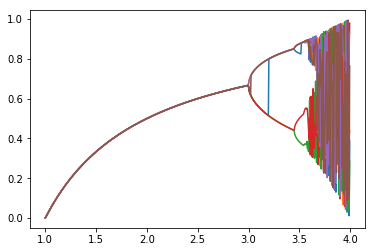

In [2]:
iterations = 1000
rs = np.arange(1., 4., 0.005)
x0s = [0.11, 0.24, 0.38, 0.54, 0.73, 0.875]

def logistic_map(x0, r, iters):
    x = x0
    for i in range(iters):
        x = r*x*(1 - x)
    return x

for x0 in x0s:
    xn = list(map(lambda r: logistic_map(x0, r, iterations), rs))
    plt.plot(rs,xn, label = "Bifurcation diagram")

Funkcja dla różnych wartości zachowuje się chaotycznie. Niewielkie zmiany wartości prowadzą do znaczącej zmieany w wynikach. Algorytm jest niestabilny numerycznie. Dla wartości r > 3 dochodzi do rozdwojeń które prowadzą do otrzymanego wykresu.

## 4.2

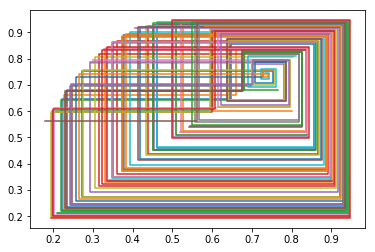

In [3]:
rs_small = [3.75, 3.768, 3.779, 3.783, 3.792, 3.8]

def logistic_map_trajectory(x0, r, iters):
    x = []
    y = []
    xi = x0
    for i in range(iters):
        x.append(xi)
        xi = r*xi*(1 - xi)
        y.append(xi)
        x.append(xi)
        y.append(xi)
    return x[-10:], y[-10:]

for r in rs_small:
    for x0 in x0s:
        x, y = logistic_map_trajectory(x0, r, 1000)
        plt.plot(x, y, label = "Trajectories")

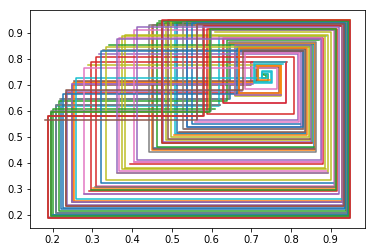

In [14]:
def logistic_map_trajectory_single(x0, r, iters):
    x = []
    y = []
    xi = np.float32(x0)
    r = np.float32(r)
    for i in range(iters):
        x.append(xi)
        xi = r*xi*(1 - xi)
        y.append(xi)
        x.append(xi)
        y.append(xi)
    return x[-10:], y[-10:]

for r in rs_small:
    for x0 in x0s:
        x, y = logistic_map_trajectory_single(x0, r, 1000)
        plt.plot(x, y, label = "Trajectories single")

Dla wielu iteracji (1000) otrzymane wyniki dla pojedynczej podwójnej precyzji są zupełnie różne. Wynika to z niestabilności numerycznej algorytmu. W obu przypadkach błędy są bardzo duże i się nawarstwiają co prowadzi do różnych wyników. 

## 4.3

In [64]:
eps = np.float32(1e-6)

def iters_to_0(x0,r):
    x = np.float32(x0)
    r = np.float32(r)
    steps = 0
    while x > eps:
        x = r * x * (1 - x)
        steps = steps + 1
    return steps

In [65]:
for x0 in x0s:
    print("For x0 = " + str(x0) + " iterations to obtain 0: " + str(iters_to_0(x0, 4)))

For x0 = 0.11 iterations to obtain 0: 6950
For x0 = 0.24 iterations to obtain 0: 1522
For x0 = 0.38 iterations to obtain 0: 3728
For x0 = 0.54 iterations to obtain 0: 5777
For x0 = 0.73 iterations to obtain 0: 6893
For x0 = 0.875 iterations to obtain 0: 3542


Podobnie jak w poprzednich podpunktach wyniki znacząco różnią się od siebie. Również wynika to z niestabilności algorytmu. Przy tak dużych blędach nie można znaleźć reguły opisującej otrzymane rezultaty.